<a href="https://colab.research.google.com/github/enakai00/colab_rlbook/blob/master/Chapter04/02_Gambler's_Problem_Value_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 12

In [0]:
class Gambler:
  def __init__(self, goal=100, win_rate=0.4):
    self.goal = goal
    self.win_rate = win_rate
    self.states = range(goal+1)

    self.policy = {}  # Define later

    self.cnt = {}
    self.value = {}
    for s in self.states:
      self.cnt[s] = 0
      self.value[s] = 0

  def play(self, s, a):
    if s == 0 or s == self.goal:
      return 0, s       # Reward, Next state

    if np.random.random() < self.win_rate:  # Win
      s = min(self.goal, s + a)
      if s == self.goal:
        return 1, s    # Reward, Next state
      return 0, s      # Reward, Next state
    else:                                   # Lose
      s -= a
      if s == 0:
        return -1, s  # Reward, Next state 
      return 0, s     # Reward, Next state

In [0]:
def show_result(gambler):
  fig = plt.figure(figsize=(14, 4))
  linex = range(1, gambler.goal)

  subplot = fig.add_subplot(1, 2, 1)
  liney = [gambler.policy[s] for s in linex]
  subplot.plot(linex, liney)
  subplot.set_title('Policy')

  subplot = fig.add_subplot(1, 2, 2)
  liney = [gambler.value[s] for s in linex]
  subplot.plot(linex, liney)
  subplot.set_title('Value')

In [0]:
def get_episode(gambler):
  episode = []
  s = np.random.randint(1, gambler.goal)
  while True:
    a = gambler.policy[s]
    r, s_new = gambler.play(s, a)
    episode.append((s, a, r))
    if s_new == 0 or s_new == gambler.goal:
      break
    s = s_new
  return episode

In [0]:
def train(gambler, num):
  c = 0
  while c < num:
    episode = get_episode(gambler)
    episode.reverse()
    total_r = 0
    for (s, a, r) in episode:
      total_r += r
      gambler.cnt[s] += 1
      gambler.value[s] += (total_r - gambler.value[s]) / gambler.cnt[s]
    c += len(episode)

In [0]:
gambler = Gambler()
for s in gambler.states:
  gambler.policy[s] = 1

In [7]:
%%time
train(gambler, 10000000)

CPU times: user 15 s, sys: 2 ms, total: 15 s
Wall time: 15.1 s


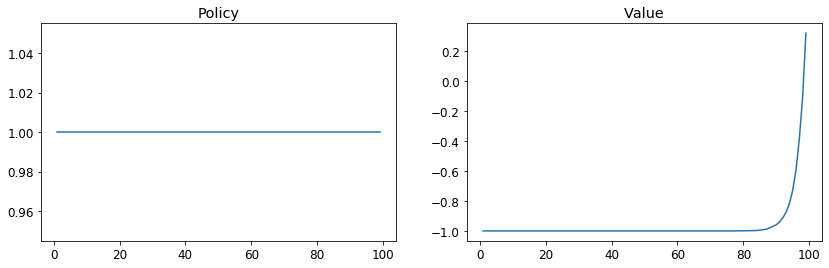

In [8]:
show_result(gambler)

In [0]:
gambler = Gambler()
for s in gambler.states:
  gambler.policy[s] = s

In [10]:
%%time
train(gambler, 10000000)

CPU times: user 1min 19s, sys: 15.9 ms, total: 1min 19s
Wall time: 1min 20s


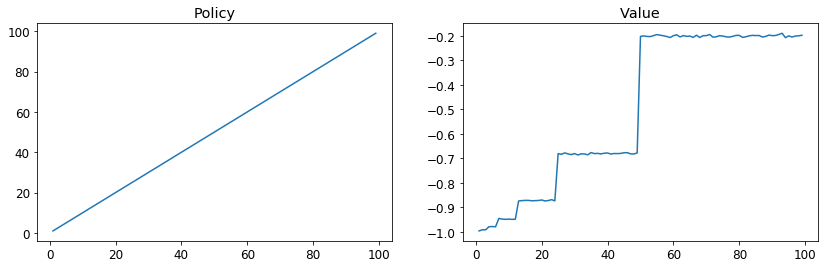

In [11]:
show_result(gambler)

In [0]:
gambler = Gambler()
for s in gambler.states:
  gambler.policy[s] = min(s, gambler.goal-s)

In [13]:
%%time
train(gambler, 10000000)

CPU times: user 56.7 s, sys: 6.75 ms, total: 56.7 s
Wall time: 57.1 s


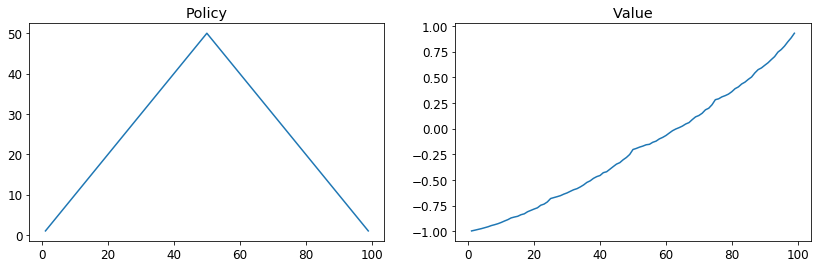

In [14]:
show_result(gambler)

In [0]:
gambler = Gambler()
for s in range(25):
  gambler.policy[s] = min(s, 25-s)
  gambler.policy[s+25] = min(s, 25-s)
  gambler.policy[s+50] = min(s, 25-s)
  gambler.policy[s+75] = min(s, 25-s)
gambler.policy[25] = 25
gambler.policy[50] = 50
gambler.policy[75] = 25

In [16]:
%%time
train(gambler, 10000000)

CPU times: user 43.4 s, sys: 9.98 ms, total: 43.4 s
Wall time: 43.8 s


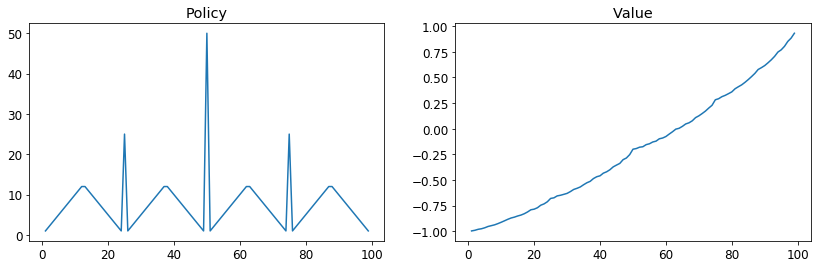

In [17]:
show_result(gambler)